In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('max.columns',None)
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [53]:
data = pd.read_excel('Datasets/Modified_carvago_data.xlsx')
data.head(3)

,Index,Car Name,Kms driven,First registration,Power,Transmission,Fuel type,Vendor,Ratings,Location,Price in Euro,Price without Vat,With or without Tax,Drive type,Features_1,Features_2,Features_3
0,0,BMW 520 d 140 kW,32 125 km,1/2019,140 kW,Automatic,Diesel,Dealership,4.1,Germany,32 899 €,27 189 €,without 21% VAT,NaN,Parking assist system self-steering,LED headlights,NaN
1,1,Kia Sorento 2.2 CRDi AWD 147 kW,63 400 km,7/2018,147 kW,Automatic,Diesel,Dealership,4.8,Germany,34 649 €,28 636 €,without 21% VAT,4x4,Ventilated front seats,Parking assist system self-steering,NaN
2,2,Opel Grandland X 147 kW,2 700 km,6/2020,147 kW,Automatic,Hybrid,Dealership,4.5,Italy,35 349 €,29 214 €,without 21% VAT,4x4,LED headlights,Electric adjustable front seats,NaN


## Exploratory Data Analysis

In [5]:
data.shape

(10020, 17)

In [6]:
data.dtypes

Index                    int64
Car Name                object
Kms driven              object
First registration      object
Power                   object
Transmission            object
Fuel type               object
Vendor                  object
Ratings                float64
Location                object
Price in Euro           object
Price without Vat       object
With or without Tax     object
Drive type              object
Features_1              object
Features_2              object
Features_3              object
dtype: object

In [7]:
data.isna().sum()

Index                     0
Car Name                  0
Kms driven                0
First registration        0
Power                     0
Transmission              0
Fuel type               422
Vendor                    0
Ratings                3562
Location                  0
Price in Euro             1
Price without Vat         1
With or without Tax    4376
Drive type             7430
Features_1              810
Features_2              951
Features_3             4564
dtype: int64

### Visualizing the missing values

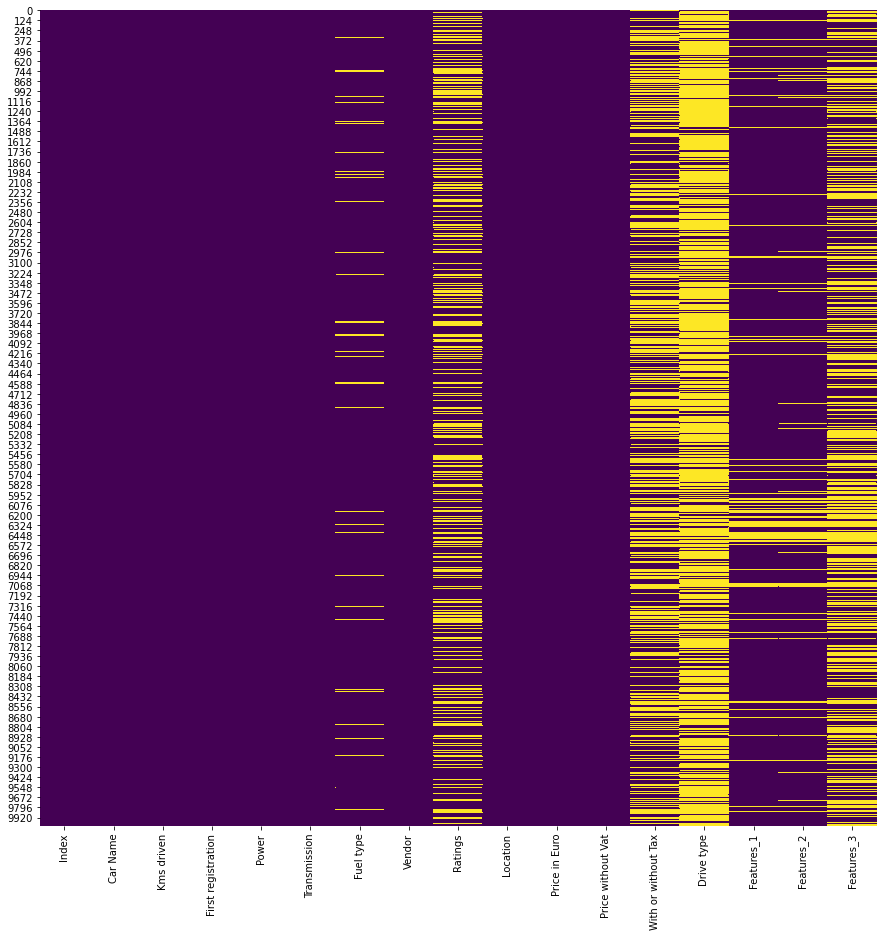

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')
plt.show()

In [3]:
print('fetures with null values:')
nan_features = [col for col in data.columns if data[col].isnull().any()]

fetures with null values:


In [220]:
#average values for nan values
data[nan_features].isnull().mean()

Fuel type              0.042116
Ratings                0.355489
Price in Euro          0.000100
Price without Vat      0.000100
With or without Tax    0.436727
Drive type             0.741517
Features_1             0.080838
Features_2             0.094910
Features_3             0.455489
dtype: float64

In [4]:
data[['Features_1','Features_2','Features_3']] 

,Features_1,Features_2,Features_3
0,Parking assist system self-steering,LED headlights,NaN
1,Ventilated front seats,Parking assist system self-steering,NaN
2,LED headlights,Electric adjustable front seats,NaN
3,Parking assist system self-steering,LED headlights,NaN
4,Parking assist system self-steering,LED headlights,NaN
...,...,...,...
10015,LED headlights,Keyless entry,Electric adjustable front seats
10016,Heated rear seats,LED headlights,Digital cockpit
10017,LED headlights,Keyless entry,Heated front seats
10018,LED headlights,Keyless entry,Electric adjustable front seats


### Handling Nan Values

In [54]:
data[['Features_1','Features_2','Features_3']] = data[['Features_1','Features_2','Features_3']].fillna('')

### Getting unique Car Features

In [55]:
features = []

for feature in data['Features_1']:
    if feature not in features and feature!='':
        features.append(feature)
len(features)

71

In [56]:
for feature in data['Features_2']:
    if feature not in features and feature!='':
        features.append(feature)
len(features)

84

In [57]:
for feature in data['Features_3']:
    if feature not in features and feature!='':
        features.append(feature)
len(features)

88

### Total fo 88 uniques Car Features

In [9]:
features

['Parking assist system self-steering',
 'Ventilated front seats',
 'LED headlights',
 'Heated front seats',
 'Heated rear seats',
 'Bluetooth',
 'Side mirrors with electic adjustment',
 'Digital cockpit',
 'Head-up display',
 'Keyless ignition',
 'Electric adjustable front seats',
 'Automatic A/C',
 'Variable stiffness suspension',
 'Traffic sign recognition',
 'Adaptive cruise control',
 'Voice control',
 'Keyless entry',
 'Automatic multi-zone A/C',
 "Driver's seat with massage function",
 'Navigation system',
 'Smartphone mirroring',
 'Apple CarPlay',
 'Sport package',
 'Air suspension',
 'Automatic lights',
 'Front seats with memory',
 'Induction charging for smartphones',
 'Laser headlights',
 'USB',
 'Panoramic roof',
 'Alloy wheels',
 'Sport front seats',
 'Xenon headlights',
 'Rear parking camera',
 'Leather',
 'Bang & Olufsen audio',
 'Paddle shifters',
 'Android auto',
 'Autonomous driving',
 'Front collision warning system',
 'Integrated music streaming',
 'Hill-start assis

### Creating columns for car features and initializing to 0

In [58]:
data[features] = 0
data.head(3)


,Index,Car Name,Kms driven,First registration,Power,Transmission,Fuel type,Vendor,Ratings,Location,Price in Euro,Price without Vat,With or without Tax,Drive type,Features_1,Features_2,Features_3,Parking assist system self-steering,Ventilated front seats,LED headlights,Heated front seats,Heated rear seats,Bluetooth,Side mirrors with electic adjustment,Digital cockpit,Head-up display,Keyless ignition,Electric adjustable front seats,Automatic A/C,Variable stiffness suspension,Traffic sign recognition,Adaptive cruise control,Voice control,Keyless entry,Automatic multi-zone A/C,Driver's seat with massage function,Navigation system,Smartphone mirroring,Apple CarPlay,Sport package,Air suspension,Automatic lights,Front seats with memory,Induction charging for smartphones,Laser headlights,USB,Panoramic roof,Alloy wheels,Sport front seats,Xenon headlights,Rear parking camera,Leather,Bang & Olufsen audio,Paddle shifters,Android auto,Autonomous driving,Front collision warning system,Integrated music streaming,Hill-start assist,Lane assist,Bose audio,Electrically heated side mirrors,WLAN/Wifi hotspot,Multifunctional steering wheel,Sport-suspension system,Adaptive lighting,Smart key,Leather steering wheel,On-board computer,Front electric windows,Daytime running lights,Heated steering wheel,Light sensor,Heated windshield,Rain sensor,Harman/Kardon audio,El. tailgate,Autom. dimming side mirros,DVD player,Alarm,Glare-free high beam headlights,Parking cameras,CD player,Blind spot assist,Automatic 2-zones air conditioning,Easy open power tailgate,Electric adjustable rear seats,Rear electric windows,Start-stop system,High beam assist,AUX,Parking sensors,TV,Burmester audio,Central locking with remote,Soft close doors,Meridian audio,Electrically foldable side mirrors,Bi-xenon headlights,Active steering,Internet connection,Alcantara interior,Night vision assist,Automatic parking brake,Gesture control
0,0,BMW 520 d 140 kW,32 125 km,1/2019,140 kW,Automatic,Diesel,Dealership,4.1,Germany,32 899 €,27 189 €,without 21% VAT,NaN,Parking assist system self-steering,LED headlights,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,Kia Sorento 2.2 CRDi AWD 147 kW,63 400 km,7/2018,147 kW,Automatic,Diesel,Dealership,4.8,Germany,34 649 €,28 636 €,without 21% VAT,4x4,Ventilated front seats,Parking assist system self-steering,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,Opel Grandland X 147 kW,2 700 km,6/2020,147 kW,Automatic,Hybrid,Dealership,4.5,Italy,35 349 €,29 214 €,without 21% VAT,4x4,LED headlights,Electric adjustable front seats,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Assigining values to Car features

In [59]:
for i in range(0,data.shape[0]):
    feature1 = data.loc[i,'Features_1']
    feature2 = data.loc[i,'Features_2']
    feature3 = data.loc[i,'Features_3']
    if(feature1 != ''):
        data.loc[i,feature1] = 1
    if(feature2 != ''):
        data.loc[i,feature2] = 1
    if(feature3 != ''):
        data.loc[i,feature3] = 1
    
data.head(3)

,Index,Car Name,Kms driven,First registration,Power,Transmission,Fuel type,Vendor,Ratings,Location,Price in Euro,Price without Vat,With or without Tax,Drive type,Features_1,Features_2,Features_3,Parking assist system self-steering,Ventilated front seats,LED headlights,Heated front seats,Heated rear seats,Bluetooth,Side mirrors with electic adjustment,Digital cockpit,Head-up display,Keyless ignition,Electric adjustable front seats,Automatic A/C,Variable stiffness suspension,Traffic sign recognition,Adaptive cruise control,Voice control,Keyless entry,Automatic multi-zone A/C,Driver's seat with massage function,Navigation system,Smartphone mirroring,Apple CarPlay,Sport package,Air suspension,Automatic lights,Front seats with memory,Induction charging for smartphones,Laser headlights,USB,Panoramic roof,Alloy wheels,Sport front seats,Xenon headlights,Rear parking camera,Leather,Bang & Olufsen audio,Paddle shifters,Android auto,Autonomous driving,Front collision warning system,Integrated music streaming,Hill-start assist,Lane assist,Bose audio,Electrically heated side mirrors,WLAN/Wifi hotspot,Multifunctional steering wheel,Sport-suspension system,Adaptive lighting,Smart key,Leather steering wheel,On-board computer,Front electric windows,Daytime running lights,Heated steering wheel,Light sensor,Heated windshield,Rain sensor,Harman/Kardon audio,El. tailgate,Autom. dimming side mirros,DVD player,Alarm,Glare-free high beam headlights,Parking cameras,CD player,Blind spot assist,Automatic 2-zones air conditioning,Easy open power tailgate,Electric adjustable rear seats,Rear electric windows,Start-stop system,High beam assist,AUX,Parking sensors,TV,Burmester audio,Central locking with remote,Soft close doors,Meridian audio,Electrically foldable side mirrors,Bi-xenon headlights,Active steering,Internet connection,Alcantara interior,Night vision assist,Automatic parking brake,Gesture control
0,0,BMW 520 d 140 kW,32 125 km,1/2019,140 kW,Automatic,Diesel,Dealership,4.1,Germany,32 899 €,27 189 €,without 21% VAT,NaN,Parking assist system self-steering,LED headlights,,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,Kia Sorento 2.2 CRDi AWD 147 kW,63 400 km,7/2018,147 kW,Automatic,Diesel,Dealership,4.8,Germany,34 649 €,28 636 €,without 21% VAT,4x4,Ventilated front seats,Parking assist system self-steering,,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,Opel Grandland X 147 kW,2 700 km,6/2020,147 kW,Automatic,Hybrid,Dealership,4.5,Italy,35 349 €,29 214 €,without 21% VAT,4x4,LED headlights,Electric adjustable front seats,,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Getting the total Car feature Score

In [60]:
data['feature_score'] = 0

In [61]:

for i in range(0,data.shape[0]):
    sum_score = 0
    for j in range(0,len(features)):
        sum_score = sum_score+data.loc[i,features[j]]
    data.loc[i,'feature_score'] = sum_score
    
data.head(3)
    

,Index,Car Name,Kms driven,First registration,Power,Transmission,Fuel type,Vendor,Ratings,Location,Price in Euro,Price without Vat,With or without Tax,Drive type,Features_1,Features_2,Features_3,Parking assist system self-steering,Ventilated front seats,LED headlights,Heated front seats,Heated rear seats,Bluetooth,Side mirrors with electic adjustment,Digital cockpit,Head-up display,Keyless ignition,Electric adjustable front seats,Automatic A/C,Variable stiffness suspension,Traffic sign recognition,Adaptive cruise control,Voice control,Keyless entry,Automatic multi-zone A/C,Driver's seat with massage function,Navigation system,Smartphone mirroring,Apple CarPlay,Sport package,Air suspension,Automatic lights,Front seats with memory,Induction charging for smartphones,Laser headlights,USB,Panoramic roof,Alloy wheels,Sport front seats,Xenon headlights,Rear parking camera,Leather,Bang & Olufsen audio,Paddle shifters,Android auto,Autonomous driving,Front collision warning system,Integrated music streaming,Hill-start assist,Lane assist,Bose audio,Electrically heated side mirrors,WLAN/Wifi hotspot,Multifunctional steering wheel,Sport-suspension system,Adaptive lighting,Smart key,Leather steering wheel,On-board computer,Front electric windows,Daytime running lights,Heated steering wheel,Light sensor,Heated windshield,Rain sensor,Harman/Kardon audio,El. tailgate,Autom. dimming side mirros,DVD player,Alarm,Glare-free high beam headlights,Parking cameras,CD player,Blind spot assist,Automatic 2-zones air conditioning,Easy open power tailgate,Electric adjustable rear seats,Rear electric windows,Start-stop system,High beam assist,AUX,Parking sensors,TV,Burmester audio,Central locking with remote,Soft close doors,Meridian audio,Electrically foldable side mirrors,Bi-xenon headlights,Active steering,Internet connection,Alcantara interior,Night vision assist,Automatic parking brake,Gesture control,feature_score
0,0,BMW 520 d 140 kW,32 125 km,1/2019,140 kW,Automatic,Diesel,Dealership,4.1,Germany,32 899 €,27 189 €,without 21% VAT,NaN,Parking assist system self-steering,LED headlights,,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,1,Kia Sorento 2.2 CRDi AWD 147 kW,63 400 km,7/2018,147 kW,Automatic,Diesel,Dealership,4.8,Germany,34 649 €,28 636 €,without 21% VAT,4x4,Ventilated front seats,Parking assist system self-steering,,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,2,Opel Grandland X 147 kW,2 700 km,6/2020,147 kW,Automatic,Hybrid,Dealership,4.5,Italy,35 349 €,29 214 €,without 21% VAT,4x4,LED headlights,Electric adjustable front seats,,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [62]:
data[['Features_1','Features_2','Features_3','feature_score']]

,Features_1,Features_2,Features_3,feature_score
0,Parking assist system self-steering,LED headlights,,2
1,Ventilated front seats,Parking assist system self-steering,,2
2,LED headlights,Electric adjustable front seats,,2
3,Parking assist system self-steering,LED headlights,,2
4,Parking assist system self-steering,LED headlights,,2
...,...,...,...,...
10015,LED headlights,Keyless entry,Electric adjustable front seats,3
10016,Heated rear seats,LED headlights,Digital cockpit,3
10017,LED headlights,Keyless entry,Heated front seats,3
10018,LED headlights,Keyless entry,Electric adjustable front seats,3


In [63]:
del data['Index']

In [199]:
data2 = data.drop(labels=features,axis=1).reset_index()

In [65]:
data2.isna().sum()

index                     0
Car Name                  0
Kms driven                0
First registration        0
Power                     0
Transmission              0
Fuel type               422
Vendor                    0
Ratings                3562
Location                  0
Price in Euro             1
Price without Vat         1
With or without Tax    4376
Drive type             7430
Features_1                0
Features_2                0
Features_3                0
feature_score             0
dtype: int64

### Renaming columns for convinience

In [200]:
data2.rename(columns={"Car Name": "Car_Name", "Kms driven": "Kms_driven",'First registration':'First_registration','Fuel type':'Fuel_type','Drive type':'Drive_type'},inplace=True)
data2.dtypes


index                    int64
Car_Name                object
Kms_driven              object
First_registration      object
Power                   object
Transmission            object
Fuel_type               object
Vendor                  object
Ratings                float64
Location                object
Price in Euro           object
Price without Vat       object
With or without Tax     object
Drive_type              object
Features_1              object
Features_2              object
Features_3              object
feature_score            int64
dtype: object

In [67]:
data2['Kms_driven']

0        32 125 km
1        63 400 km
2         2 700 km
3        26 145 km
4        28 199 km
           ...    
10015    47 800 km
10016    16 500 km
10017    33 002 km
10018    63 000 km
10019    25 690 km
Name: Kms_driven, Length: 10020, dtype: object

In [68]:
data2['Kms_driven'].isna().sum()

0

### Cleaning Kms_driven column

In [201]:
data2['Kms_driven'] = data2['Kms_driven'].apply(lambda x:x.strip())
data2['Kms_driven'] = data2['Kms_driven'].apply(lambda x: x[:-3] if x[-2:]=='km' else x)
data2['Kms_driven'] = data2['Kms_driven'].apply(lambda x:x.replace('\xa0',''))


In [202]:
data2['Kms_driven'].nunique()

6616

In [203]:
data2[data2['Kms_driven'].str.contains(r'[@#&$%+-/*]')]

,index,Car_Name,Kms_driven,First_registration,Power,Transmission,Fuel_type,Vendor,Ratings,Location,Price in Euro,Price without Vat,With or without Tax,Drive_type,Features_1,Features_2,Features_3,feature_score
535,535,Volkswagen T-Roc TSI 110 kW,1/2022,110 kW,Automatic,Petrol,NaN,Dealership,NaN,Poland,23 249 €,19 214 €,without 21% VAT,NaN,Parking assist system self-steering,Digital cockpit,,2
570,570,Hyundai i30 118 kW,1/2022,118 kW,Manual,Petrol,NaN,Dealership,NaN,Poland,21 399 €,17 685 €,without 21% VAT,NaN,Heated front seats,Android auto,Bluetooth,3
591,591,Audi Q2 35 TFSI S 110 kW,1/2022,110 kW,Automatic,Petrol,NaN,Dealership,NaN,Poland,31 099 €,25 702 €,without 21% VAT,NaN,Digital cockpit,Automatic A/C,,2
626,626,Audi Q5 40 TDI Quattro S tronic 150 kW,1/2022,150 kW,Automatic,Diesel,4x4,Dealership,NaN,Poland,49 349 €,40 784 €,without 21% VAT,NaN,Adaptive cruise control,Bang & Olufsen audio,Bluetooth,3
633,633,Audi Q5 40 TDI Quattro S tronic 150 kW,1/2022,150 kW,Automatic,Diesel,4x4,Dealership,NaN,Poland,53 649 €,44 338 €,without 21% VAT,NaN,Automatic A/C,Alarm,USB,3
777,777,Audi Q2 35 TFSI S 110 kW,1/2022,110 kW,Automatic,Petrol,NaN,Dealership,NaN,Poland,31 749 €,26 239 €,without 21% VAT,NaN,Digital cockpit,Automatic A/C,,2
816,816,Audi A4 150 kW,1/2022,150 kW,Automatic,Petrol,4x4,Dealership,NaN,Poland,47 049 €,38 883 €,without 21% VAT,NaN,LED headlights,Digital cockpit,Navigation system,3
860,860,Hyundai i30 118 kW,1/2022,118 kW,Manual,Petrol,NaN,Dealership,NaN,Poland,22 099 €,18 264 €,without 21% VAT,NaN,Heated front seats,Android auto,Bluetooth,3
1171,1171,Audi Q5 40 TDI Quattro S tronic 150 kW,1/2022,150 kW,Automatic,Diesel,4x4,Dealership,NaN,Poland,55 699 €,46 032 €,without 21% VAT,NaN,LED headlights,Adaptive cruise control,Bang & Olufsen audio,3
1177,1177,BMW X1 110 kW,2/2022,110 kW,Automatic,Diesel,NaN,Dealership,4.5,Italy,38 099 €,Not deductible,NaN,NaN,,,,0


In [204]:
data2[data2['Kms_driven'].str.contains(r'[@#&$%+-/*]')].shape

(45, 18)

In [205]:
data2['temp'] = data2['Kms_driven']
count = 0
for i in data2[data2['temp'].str.contains(r'[@#&$%+-/*]')].values:
        data2.loc[i[0],'Fuel_type']=data2.loc[i[0],'Transmission']
        data2.loc[i[0],'Transmission']=data2.loc[i[0],'Power']
        data2.loc[i[0],'Power']=data2.loc[i[0],'First_registration']
        data2.loc[i[0],'First_registration']=data2.loc[i[0],'Kms_driven']
        count = count+1

            
count
        


45

In [206]:
data2[data2['Kms_driven'].str.contains(r'[@#&$%+-/*]')].shape

(45, 19)

### imputing with mean of km driven value

In [207]:
selrows = data2[data2['Kms_driven'].str.contains(r'[@#&$%+-/*]')]
mean_km = data2.drop(selrows.index)['Kms_driven'].astype(float).mean()
mean_km = str(round(mean_km,0))
mean_km

'29275.0'

In [208]:

data2['temp'] = data2['temp'].apply(lambda x: mean_km if x.find(r'[@#&$%+-/*]') else x)


In [209]:
data2['temp'] = data2['temp'].astype(float)

In [210]:
data2['Kms_driven'] = data2['temp']

In [211]:
del data2['temp']

In [129]:
data2.shape

(10020, 18)

In [212]:
data2['Kms_driven'].isna().sum()

0

In [132]:
data2[['First_registration']]

,First_registration
0,1/2019
1,7/2018
2,6/2020
3,3/2021
4,2/2021
...,...
10015,11/2018
10016,4/2021
10017,7/2018
10018,11/2018


###  First_registration 

In [213]:
data2[['First_registration']].dtypes,data2['First_registration'].isna().sum()

(First_registration    object
 dtype: object,
 0)

In [214]:
data2[data2['First_registration'].str.contains(r'[kW]')].shape

(0, 18)

In [215]:
data2['First_registration'] = pd.to_datetime(data2['First_registration'],format='%m/%Y')

### Power

In [216]:
data2[['Power']],data2['Power'].dtypes,data2.Power.isna().sum()

(        Power
 0      140 kW
 1      147 kW
 2      147 kW
 3      140 kW
 4      140 kW
 ...       ...
 10015  240 kW
 10016  120 kW
 10017  228 kW
 10018  190 kW
 10019  140 kW
 
 [10020 rows x 1 columns],
 dtype('O'),
 0)

In [217]:
data2['Power'] = data2['Power'].apply(lambda x:x.strip())
data2['Power'] = data2['Power'].apply(lambda x: x[:-3] if x[-2:]=='kW' else x)
data2['Power'] = data2['Power'].apply(lambda x:x.strip())


In [218]:
data2.head(2)

,index,Car_Name,Kms_driven,First_registration,Power,Transmission,Fuel_type,Vendor,Ratings,Location,Price in Euro,Price without Vat,With or without Tax,Drive_type,Features_1,Features_2,Features_3,feature_score
0,0,BMW 520 d 140 kW,29275.0,2019-01-01,140,Automatic,Diesel,Dealership,4.1,Germany,32 899 €,27 189 €,without 21% VAT,NaN,Parking assist system self-steering,LED headlights,,2
1,1,Kia Sorento 2.2 CRDi AWD 147 kW,29275.0,2018-07-01,147,Automatic,Diesel,Dealership,4.8,Germany,34 649 €,28 636 €,without 21% VAT,4x4,Ventilated front seats,Parking assist system self-steering,,2


In [219]:
print(data2[data2['Power'].str.isalpha()].shape)
data2[data2['Power'].str.isalpha()].head(2)

(673, 18)


,index,Car_Name,Kms_driven,First_registration,Power,Transmission,Fuel_type,Vendor,Ratings,Location,Price in Euro,Price without Vat,With or without Tax,Drive_type,Features_1,Features_2,Features_3,feature_score
17,17,Volvo V60 Cross Country D4 AWD 140 kW,29275.0,2019-12-01,Automatic,Diesel,4x4,Dealership,NaN,Sweden,31 999 €,26 445 €,without 21% VAT,NaN,Heated rear seats,Keyless entry,Heated front seats,3
61,61,Dacia Duster dCi 110 2WD EDC 80 kW,29275.0,2017-12-01,Automatic,Diesel,NaN,Dealership,NaN,Sweden,13 099 €,10 826 €,without 21% VAT,NaN,Heated front seats,Bluetooth,Automatic A/C,3


### Extracting power from Car Name

In [220]:
for i in data2[data2['Power'].str.isalpha()].values:
        if pd.isna(data2.loc[i[0],'Drive_type']):
            data2.loc[i[0],'Drive_type']=data2.loc[i[0],'Fuel_type']
            data2.loc[i[0],'Fuel_type']=data2.loc[i[0],'Transmission']
            data2.loc[i[0],'Transmission']=data2.loc[i[0],'Power']
            data2.loc[i[0],'Power'] = i[1].split()[-2]
        


In [221]:
data2.query('Power=="Automatic"')

,index,Car_Name,Kms_driven,First_registration,Power,Transmission,Fuel_type,Vendor,Ratings,Location,Price in Euro,Price without Vat,With or without Tax,Drive_type,Features_1,Features_2,Features_3,feature_score


In [222]:
data2[data2['Power'].str.contains(r'[@#&$%+-/*]')]

,index,Car_Name,Kms_driven,First_registration,Power,Transmission,Fuel_type,Vendor,Ratings,Location,Price in Euro,Price without Vat,With or without Tax,Drive_type,Features_1,Features_2,Features_3,feature_score


In [223]:
data2['Power'] = data2['Power'].astype(int)

In [224]:
data2['Power'].isna().sum()

0

### Transmission

In [225]:
data2['Transmission'].unique(),data2['Transmission'].isna().sum()

(array(['Automatic', 'Manual'], dtype=object), 0)

In [226]:
data2['Fuel_type'].unique(),data2['Fuel_type'].isna().sum()

(array(['Diesel', 'Hybrid', 'Petrol', 'Electric', 'LPG', 'Other fuel type',
        'CNG', 'Hydrogen'], dtype=object),
 0)

In [227]:
data2['Vendor'].unique(),data2['Vendor'].isna().sum()

(array(['Dealership', 'Used cars seller'], dtype=object), 0)

### Ratings

In [228]:
data2['Ratings'].unique(),data2['Ratings'].isna().sum()

(array([4.1, 4.8, 4.5, 4.7, 4.2, nan, 4.9, 4.4, 4.6, 3. , 5. , 4. , 3.5,
        4.3, 2.5, 2. , 1. , 3.8, 3.6, 3.3, 3.9, 1.5, 3.7, 3.4]),
 3562)

In [229]:
print(data2[data2['Ratings'].isnull()].shape)
data2[data2['Ratings'].isnull()].head()

(3562, 18)


,index,Car_Name,Kms_driven,First_registration,Power,Transmission,Fuel_type,Vendor,Ratings,Location,Price in Euro,Price without Vat,With or without Tax,Drive_type,Features_1,Features_2,Features_3,feature_score
7,7,Honda Jazz 80 kW,29275.0,2021-04-01,80,Automatic,Hybrid,Dealership,NaN,France,20 299 €,Not deductible,NaN,NaN,Heated front seats,Automatic lights,Hill-start assist,3
10,10,Volkswagen up! 55 kW,29275.0,2015-01-01,55,Manual,Petrol,Dealership,NaN,Poland,6 899 €,5 702 €,without 21% VAT,NaN,Side mirrors with electic adjustment,Daytime running lights,,2
11,11,Skoda Superb 115 kW,29275.0,2021-05-01,115,Automatic,Hybrid,Dealership,NaN,France,32 399 €,Not deductible,NaN,NaN,Digital cockpit,Android auto,Voice control,3
14,14,Seat Tarraco 2.0 TDI SCR 110 kW,29275.0,2021-06-01,110,Automatic,Diesel,Dealership,NaN,France,36 599 €,Not deductible,NaN,NaN,LED headlights,Digital cockpit,Voice control,3
17,17,Volvo V60 Cross Country D4 AWD 140 kW,29275.0,2019-12-01,140,Automatic,Diesel,Dealership,NaN,Sweden,31 999 €,26 445 €,without 21% VAT,4x4,Heated rear seats,Keyless entry,Heated front seats,3


## Removing Ratings feature

In [230]:
del data2['Ratings']

In [231]:
data2['Location'].unique(),data2['Location'].isna().sum(),data2['Location'].dtypes

(array(['Germany', 'Italy', 'France', 'Poland', 'Austria', 'Sweden',
        'Spain', 'Belgium', 'Netherlands', 'Luxembourg', 'Slovakia'],
       dtype=object),
 0,
 dtype('O'))

In [232]:
data2.head(3)

,index,Car_Name,Kms_driven,First_registration,Power,Transmission,Fuel_type,Vendor,Location,Price in Euro,Price without Vat,With or without Tax,Drive_type,Features_1,Features_2,Features_3,feature_score
0,0,BMW 520 d 140 kW,29275.0,2019-01-01,140,Automatic,Diesel,Dealership,Germany,32 899 €,27 189 €,without 21% VAT,NaN,Parking assist system self-steering,LED headlights,,2
1,1,Kia Sorento 2.2 CRDi AWD 147 kW,29275.0,2018-07-01,147,Automatic,Diesel,Dealership,Germany,34 649 €,28 636 €,without 21% VAT,4x4,Ventilated front seats,Parking assist system self-steering,,2
2,2,Opel Grandland X 147 kW,29275.0,2020-06-01,147,Automatic,Hybrid,Dealership,Italy,35 349 €,29 214 €,without 21% VAT,4x4,LED headlights,Electric adjustable front seats,,2


### Renaming clolumns

In [233]:
data2.rename(columns={"Price in Euro": "Price_Euro","Price without Vat":"Price_wo_Vat",'With or without Tax':'Wt_wtout_Tax'},inplace=True)
data2['Price_Euro'].unique(),data2['Price_Euro'].isna().sum(),data2['Price_Euro'].dtypes


(array(['32\xa0899\xa0€', '34\xa0649\xa0€', '35\xa0349\xa0€', ...,
        '51\xa0349\xa0€', '67\xa0299\xa0€', '73\xa0099\xa0€'], dtype=object),
 1,
 dtype('O'))

### Price_Euro

In [234]:
data2[data2['Price_Euro'].isnull()]

,index,Car_Name,Kms_driven,First_registration,Power,Transmission,Fuel_type,Vendor,Location,Price_Euro,Price_wo_Vat,Wt_wtout_Tax,Drive_type,Features_1,Features_2,Features_3,feature_score
9378,9378,Mercedes-Benz GLC 220 d 4Matic 143 kW,29275.0,2020-07-01,143,Automatic,Diesel,Dealership,Germany,NaN,NaN,NaN,4x4,LED headlights,Digital cockpit,,2


In [235]:
data2 = data2[data2['Price_Euro'].notna()]
data2.shape

(10019, 17)

In [236]:
data2.reset_index(drop=True,inplace=True)

In [237]:
data2['Temp_price'] = data2['Price_Euro']

In [238]:
data2.head(3)

,index,Car_Name,Kms_driven,First_registration,Power,Transmission,Fuel_type,Vendor,Location,Price_Euro,Price_wo_Vat,Wt_wtout_Tax,Drive_type,Features_1,Features_2,Features_3,feature_score,Temp_price
0,0,BMW 520 d 140 kW,29275.0,2019-01-01,140,Automatic,Diesel,Dealership,Germany,32 899 €,27 189 €,without 21% VAT,NaN,Parking assist system self-steering,LED headlights,,2,32 899 €
1,1,Kia Sorento 2.2 CRDi AWD 147 kW,29275.0,2018-07-01,147,Automatic,Diesel,Dealership,Germany,34 649 €,28 636 €,without 21% VAT,4x4,Ventilated front seats,Parking assist system self-steering,,2,34 649 €
2,2,Opel Grandland X 147 kW,29275.0,2020-06-01,147,Automatic,Hybrid,Dealership,Italy,35 349 €,29 214 €,without 21% VAT,4x4,LED headlights,Electric adjustable front seats,,2,35 349 €


In [239]:
for i in range(0,data2.shape[0]):
    try:
        if data2.loc[i,'Temp_price'][-1:]=='€':
            data2.loc[i,'Temp_price'] = data2.loc[i,'Temp_price'][:-1]
            data2.loc[i,'Temp_price'] = data2.loc[i,'Temp_price'].strip()
            data2.loc[i,'Temp_price'] = data2.loc[i,'Temp_price'].replace('\xa0','')
            
    except:
        print("Something went wrong")
        print(i)


In [240]:
data2['Price_Euro'] = data2['Temp_price']

In [241]:
data2['Price_Euro'] = data2['Price_Euro'].astype(float)

In [242]:
del data2['Temp_price']

In [243]:
data2.dtypes,data2.isna().sum()

(index                          int64
 Car_Name                      object
 Kms_driven                   float64
 First_registration    datetime64[ns]
 Power                          int64
 Transmission                  object
 Fuel_type                     object
 Vendor                        object
 Location                      object
 Price_Euro                   float64
 Price_wo_Vat                  object
 Wt_wtout_Tax                  object
 Drive_type                    object
 Features_1                    object
 Features_2                    object
 Features_3                    object
 feature_score                  int64
 dtype: object,
 index                    0
 Car_Name                 0
 Kms_driven               0
 First_registration       0
 Power                    0
 Transmission             0
 Fuel_type                0
 Vendor                   0
 Location                 0
 Price_Euro               0
 Price_wo_Vat             0
 Wt_wtout_Tax          4375
 D

### deleting Price_wo_Vat

In [244]:
del data2['Price_wo_Vat']

### Deleting Wt_wtout_Tax

In [245]:
del data2['Wt_wtout_Tax']

In [246]:
data2.dtypes

index                          int64
Car_Name                      object
Kms_driven                   float64
First_registration    datetime64[ns]
Power                          int64
Transmission                  object
Fuel_type                     object
Vendor                        object
Location                      object
Price_Euro                   float64
Drive_type                    object
Features_1                    object
Features_2                    object
Features_3                    object
feature_score                  int64
dtype: object

### Deleting car features

In [248]:
data2.drop(labels=['Features_1','Features_2','Features_3'],axis=1,inplace=True)

### Drive Type

In [250]:
data2['Drive_type'].unique(),data2['Drive_type'].isna().sum()

(array([nan, '4x4'], dtype=object), 7146)

In [251]:
data2['Drive_type'].fillna('2x4',inplace=True)

In [253]:
data2.isna().sum(),data2.shape,data2.dtypes

(index                 0
 Car_Name              0
 Kms_driven            0
 First_registration    0
 Power                 0
 Transmission          0
 Fuel_type             0
 Vendor                0
 Location              0
 Price_Euro            0
 Drive_type            0
 feature_score         0
 dtype: int64,
 (10019, 12),
 index                          int64
 Car_Name                      object
 Kms_driven                   float64
 First_registration    datetime64[ns]
 Power                          int64
 Transmission                  object
 Fuel_type                     object
 Vendor                        object
 Location                      object
 Price_Euro                   float64
 Drive_type                    object
 feature_score                  int64
 dtype: object)